apply Logistic Regression to train a model on this dataset.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset 
column_names = [
    "id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
    "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se",
    "concave_points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst",
    "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst",
    "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
]


In [9]:
# URL for the WDBC dataset on the UCI Machine Learning Repository
wdbc_url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases"
    "/breast-cancer-wisconsin/wdbc.data"
)

# Download and read into a DataFrame
df = pd.read_csv(wdbc_url, header=None, names=column_names)

# Display the first few rows
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [10]:
# Drop ID column
df = df.drop(columns=["id"])

# Encode target: M=1 (malignant), B=0 (benign)
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

# Split features and target
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [11]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Train logistic regression
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [13]:
# Predict
y_pred = model.predict(X_test)

In [14]:
# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])  # 1 = Malignant, 0 = Benign

In [15]:
report = classification_report(y_test, y_pred, labels=[1, 0], target_names=["Malignant", "Benign"])

In [16]:

# Display results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


Confusion Matrix:
 [[ 60   4]
 [  1 106]]

Classification Report:
               precision    recall  f1-score   support

   Malignant       0.98      0.94      0.96        64
      Benign       0.96      0.99      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



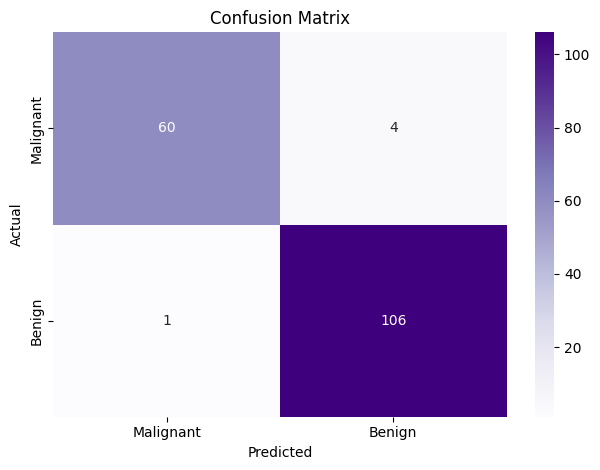

In [17]:
# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples", xticklabels=["Malignant", "Benign"], yticklabels=["Malignant", "Benign"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

Fine-tuning the model 

In [18]:
# Train logistic regression
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [19]:
# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Apply custom threshold
threshold = 0.3
y_pred_custom = (y_probs >= threshold).astype(int)


In [20]:
# Classification Report
report = classification_report(y_test, y_pred_custom, target_names=["Benign", "Malignant"])

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_custom, labels=[1, 0])

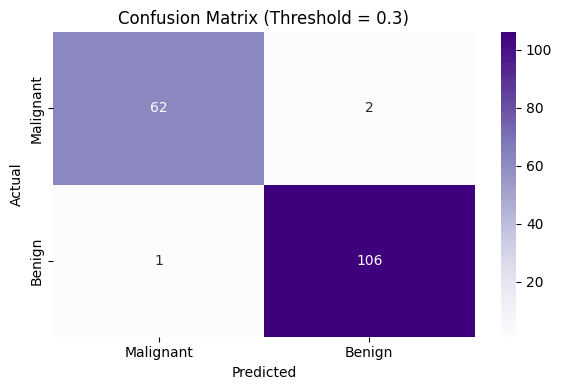

In [21]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Purples",
    xticklabels=["Malignant", "Benign"],
    yticklabels=["Malignant", "Benign"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Threshold = 0.3)")
plt.tight_layout()
plt.show()